In [1]:
from Objects import Inertial_Object
from numpy_utils import converters as cnvs
import Plotters as sim_plt

### Same gain, different time constants (inertion factor)

In [2]:
K = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
T = [[1, 0, 0], [0, .5, 0], [0, 0, 1.5]]
obj = Inertial_Object(time_const=T, gain=K, sampling_time=0.1)

In [3]:
obj.summary()

This is an inertial object.
Gain matrix: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Time constants matrix: 
[[1.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1.5]]
Sampling time: 0.1


In [4]:
obj.reset_history()
conv = cnvs.to_array_converter()
for i in range(0, 100):
    u1=0 if i < 20 else 1
    u2=0 if i < 20 else 1
    u3=0 if i < 20 else 1
    u = conv.convert_any_type([u1, u2, u3])
    obj.simulate_step(u)

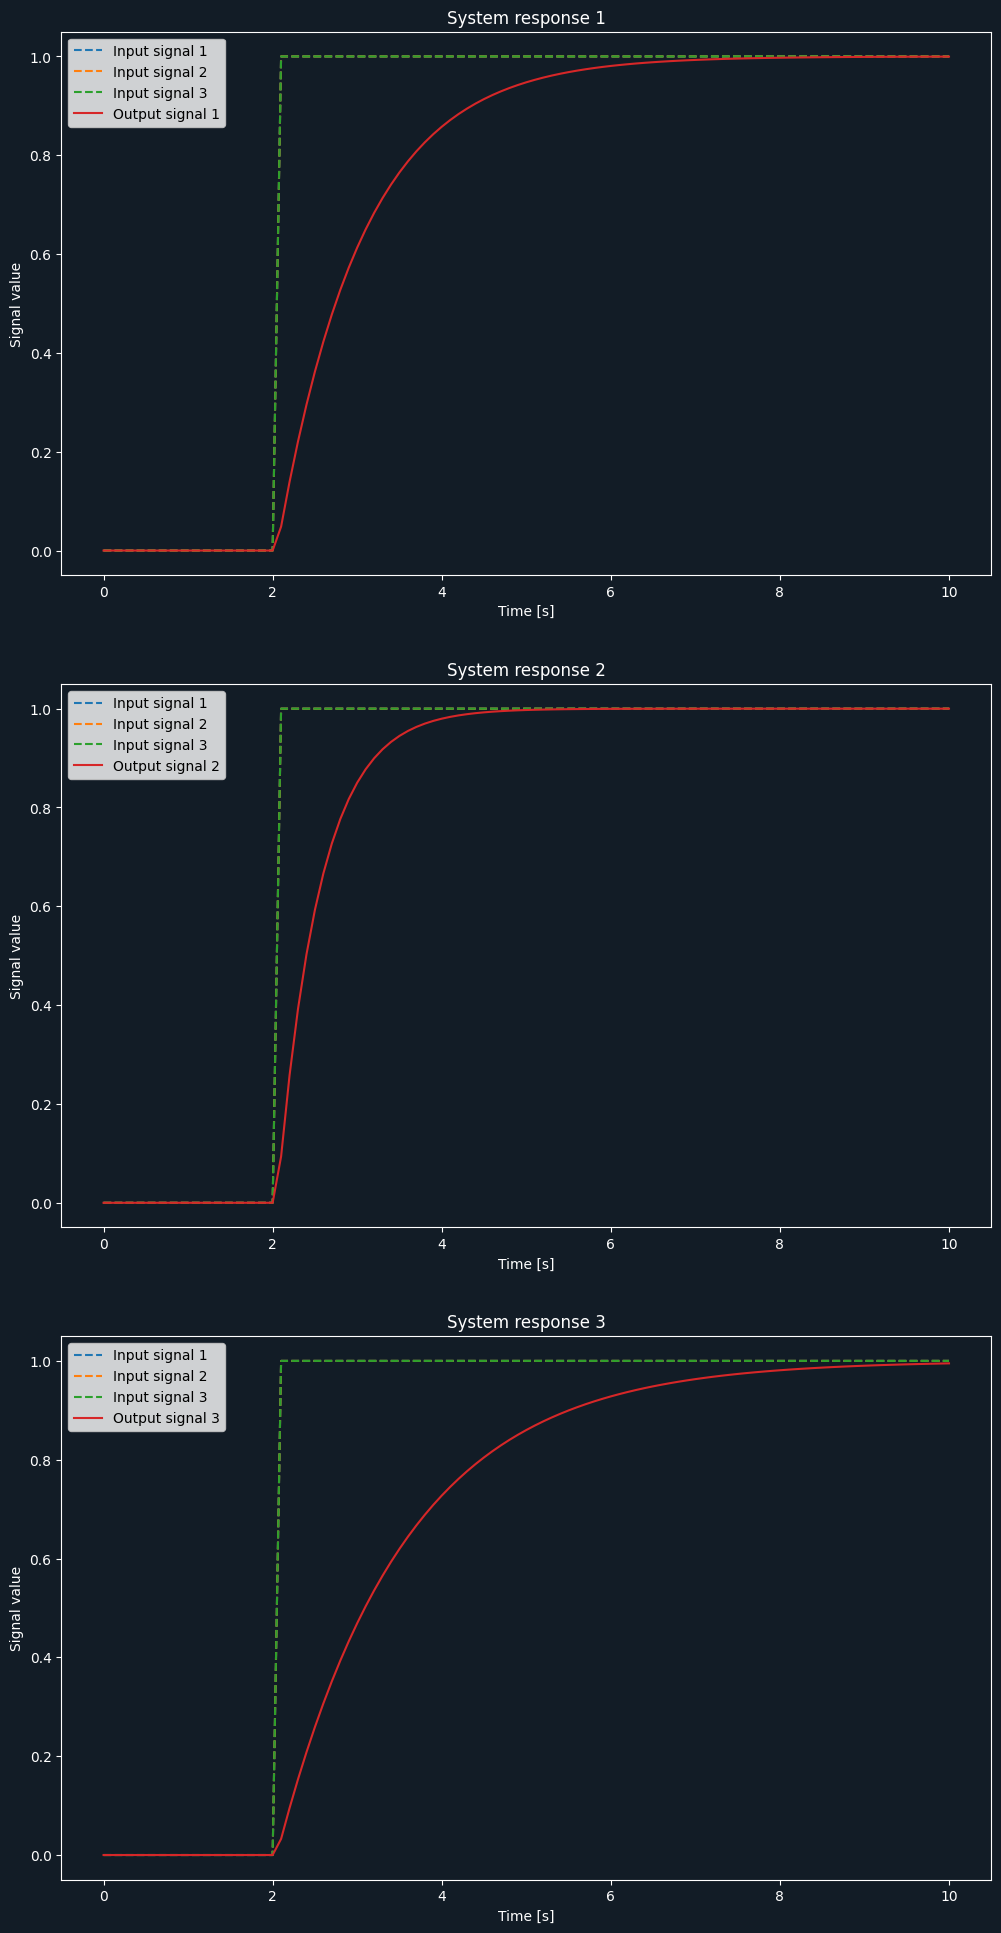

In [5]:
sim_plt.plot_object_history(obj, figsize=(12, 24))

### Proportional object as an inertion with Tc = 0

In [6]:
K = [[0.8, 0, 0], [0, 0.8, 0], [0, 0, 0.8]]
T = [[1, 0.3, 0], [0, 0.1, 0], [0, 0, 0]]
obj = Inertial_Object(time_const=T, gain=K, sampling_time=0.1)

In [7]:
conv = cnvs.to_array_converter()
obj.reset_history()
for i in range(0, 100):
    u1=0 if i < 20 else 1
    u2=0 if i < 20 else 1
    u3=0 if i < 20 else 1
    u = conv.convert_any_type([u1, u2, u3])
    obj.simulate_step(u)

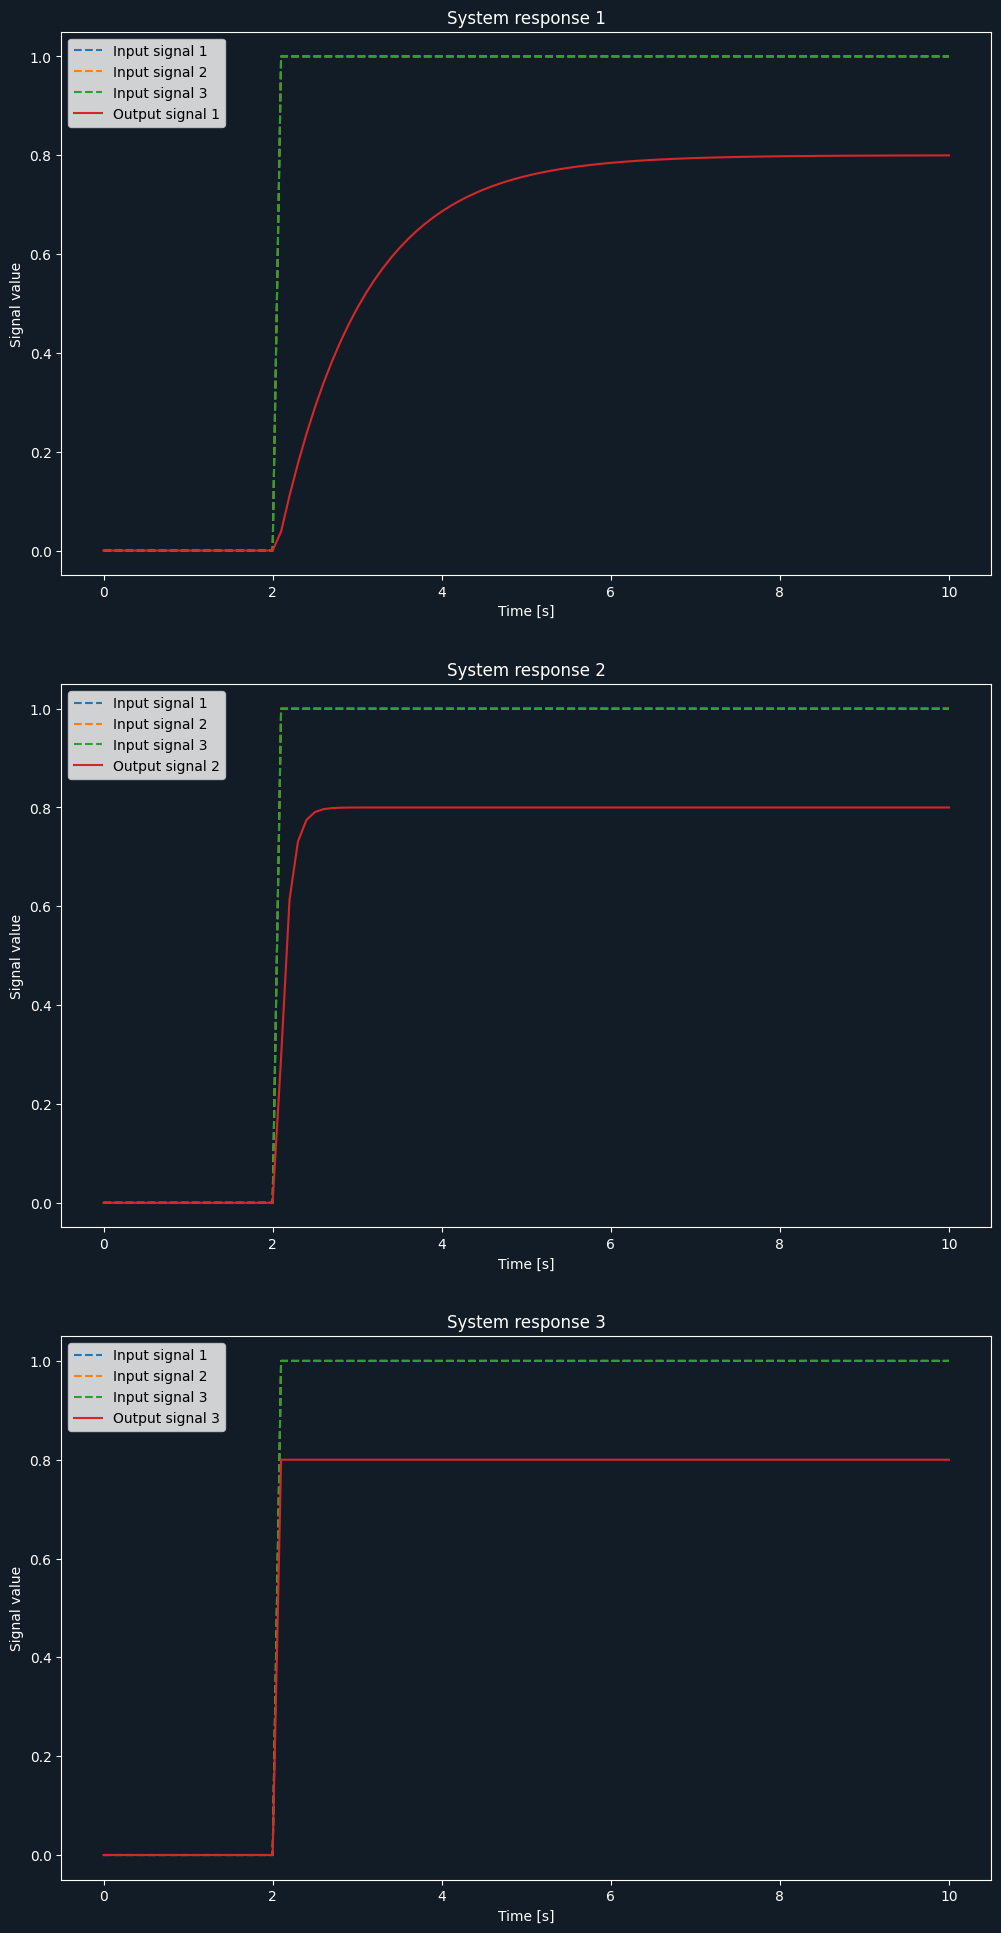

In [8]:
sim_plt.plot_object_history(obj, figsize=(12, 24))

### MIMO example

In [9]:
K = [[0.8, 0.1, 0.1], [0.3, 0.3, 0.4], [0.25, 0.5, 0.25]]
T = [[1, 0.3, 1.2], [0.7, 0.1, 0.2], [0.8, 1, 1.5]]
obj = Inertial_Object(time_const=T, gain=K, sampling_time=0.1)

In [10]:
conv = cnvs.to_array_converter()
for i in range(0, 200):
    u1=0 if i < 20 else 1
    u2=0 if i < 50 else 1
    u3=0 if i < 70 else 1
    u = conv.convert_any_type([u1, u2, u3])
    obj.simulate_step(u)
for i in range(0, 100):
    u1 = 0 if i > 10 else 1
    u2 = 0 if i > 20 else 1
    u3 = 0 if i > 30 else 1
    u = conv.convert_any_type([u1, u2, u3])
    obj.simulate_step(u)

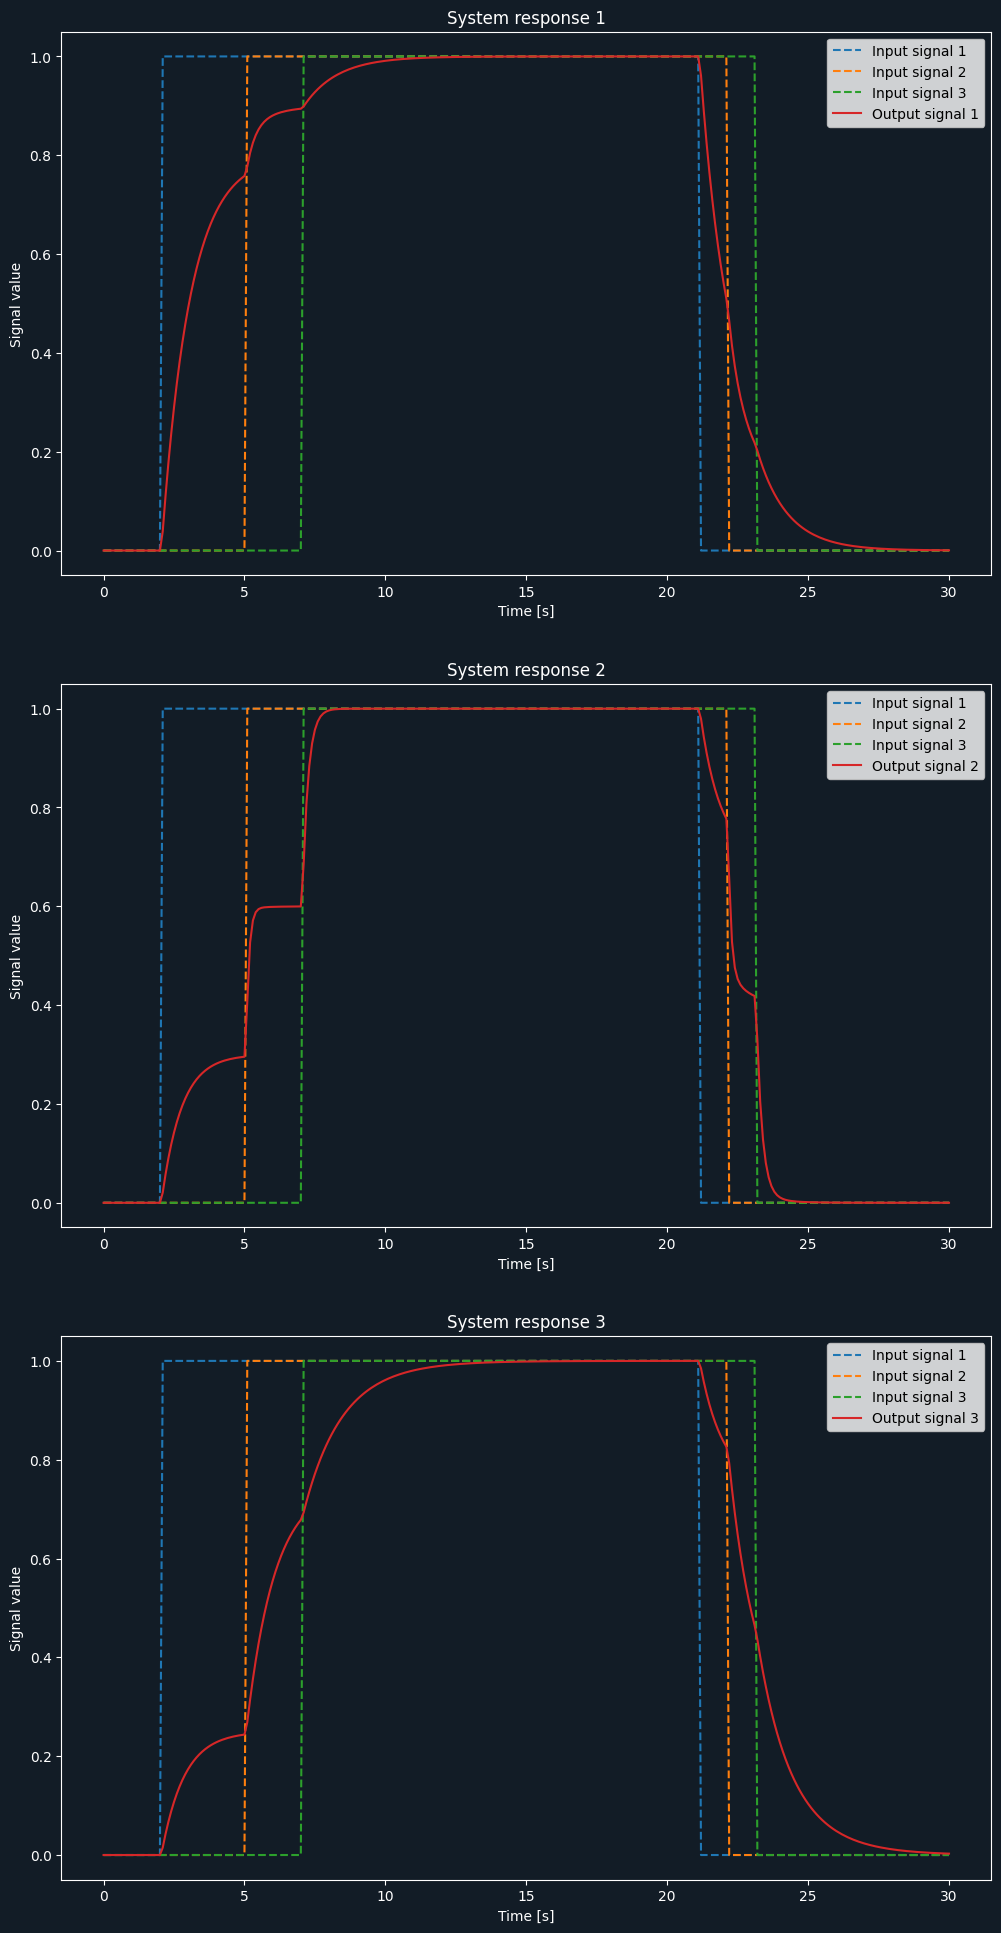

In [11]:
sim_plt.plot_object_history(obj, figsize=(12, 24))